# Notebook imports all the packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Example 1

## $f(x) = x^2 + x + 1$

In [3]:
def f(x):
    return x**2 + x + 1

In [4]:
# Make Data
x_1 = np.linspace(start = -3, stop = 3, num = 10)

In [5]:
x_1

array([-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
        0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ])

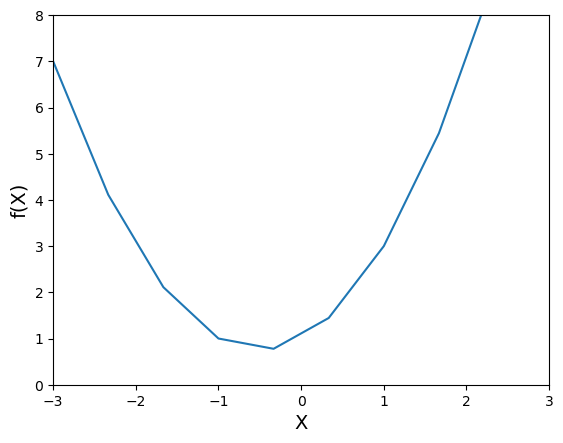

In [6]:
# Plot

plt.xlim([-3,3])
plt.ylim(0,8)

plt.xlabel('X', fontsize = 14)
plt.ylabel('f(X)', fontsize = 14)

plt.plot(x_1, f(x_1))
plt.show()

## Slopes and Derivatives

In [7]:
def df(x):
    return 2*x + 1

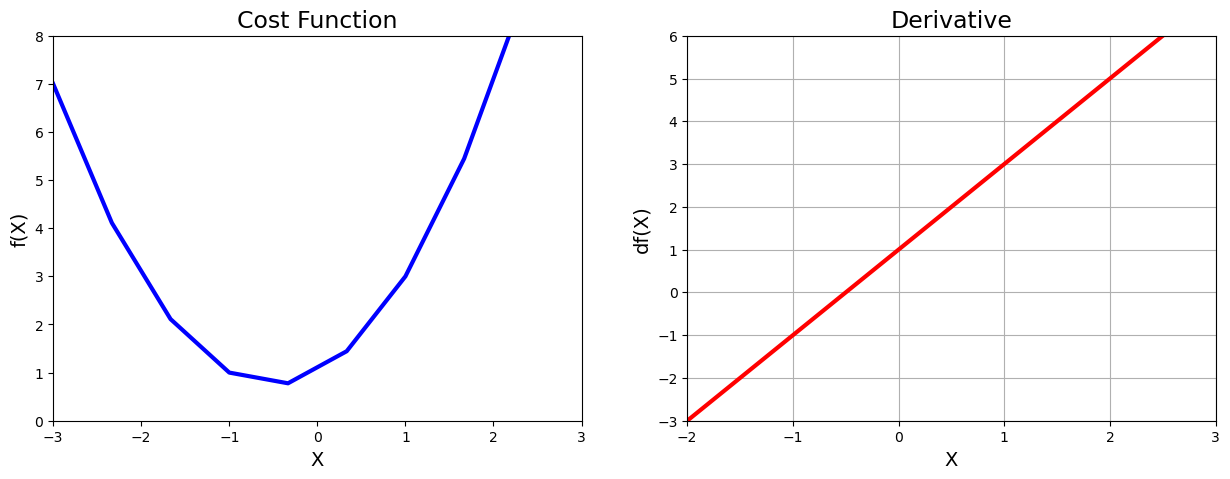

In [8]:
# Plot Function and Derivative side by side 

plt.figure(figsize = [15,5])

#Chart 1: Cost Function
plt.subplot(1, 2, 1)  # rows, columns , Index
plt.title("Cost Function", fontsize = 17)

plt.xlim([-3,3])
plt.ylim(0,8)

plt.xlabel('X', fontsize = 14)
plt.ylabel('f(X)', fontsize = 14)
plt.plot(x_1, f(x_1), color = 'b', linewidth = 3)

# Chart 2: Derivative
plt.subplot(1, 2, 2) 
plt.title("Derivative", fontsize = 17)

plt.grid()
plt.xlim([-2,3])
plt.ylim(-3,6)

plt.xlabel('X', fontsize = 14)
plt.ylabel('df(X)', fontsize = 14)

plt.plot(x_1, df(x_1), color = 'r', linewidth = 3)

plt.show()

# Python Loops & Gradient Descent 

In [9]:
# Python for loop
# for n in range(5):
#     print()

In [14]:
new_x = 3
prev_x = 0
step_multiplier = 0.1
precision = 0.0001

new_x_list = [new_x]
slope_list = [df(prev_x)]


for n in range(500):
    prev_x = new_x
    gradient = df(prev_x)
    new_x = prev_x - step_multiplier * gradient
    
    step_size = abs(new_x - prev_x)
    
    new_x_list.append(new_x)
    slope_list.append(df(new_x))
    
#     print(step_size)
    if step_size < precision:
        print("Loop ran: ", n, " times")
        break
        
print("Local min: ", new_x)
print("Slope of df(x) value at this point is: ", df(new_x))
print("f(x) value or cost at this point is: ", f(new_x))

Loop ran:  40  times
Local min:  -0.49962781616118024
Slope of df(x) value at this point is:  0.0007443676776395236
f(x) value or cost at this point is:  0.7500001385208099


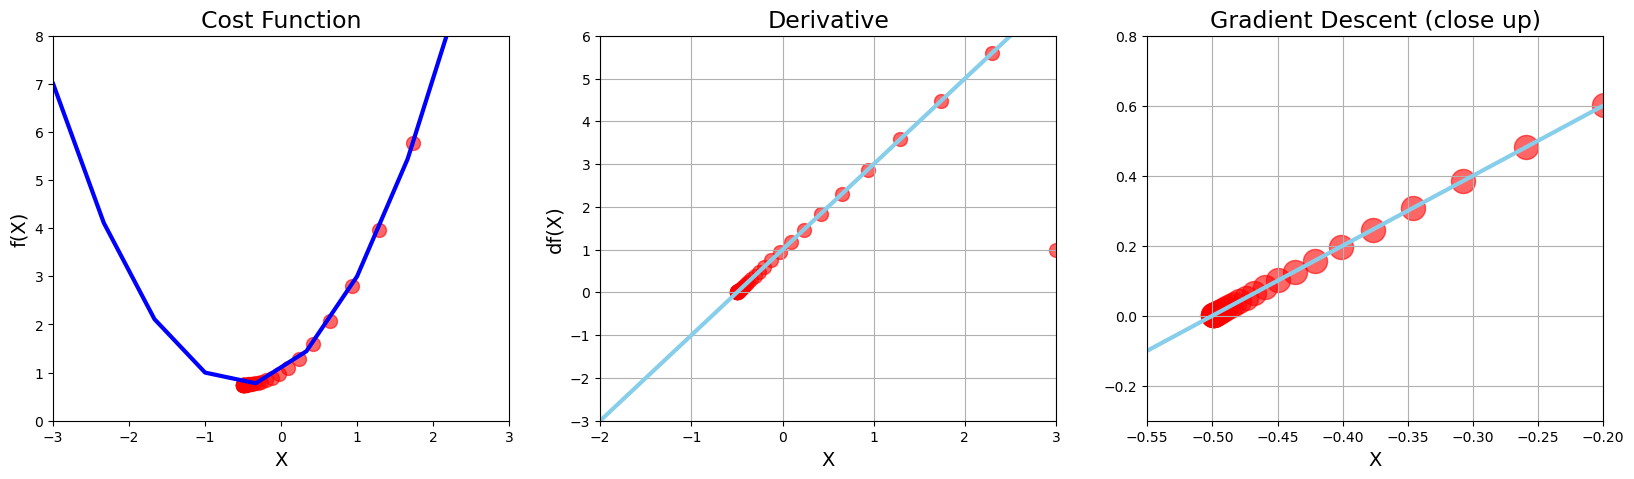

In [29]:
# Super Impose the Gradient Descent calculations on plot 

plt.figure(figsize = [20,5])

#Chart 1: Cost Function
plt.subplot(1, 3, 1)  # rows, columns , Index
plt.title("Cost Function", fontsize = 17)

plt.xlim([-3,3])
plt.ylim(0,8)

plt.xlabel('X', fontsize = 14)
plt.ylabel('f(X)', fontsize = 14)
plt.plot(x_1, f(x_1), color = 'b', linewidth = 3)

values = np.array(new_x_list)
plt.scatter(new_x_list, f(values), color = "red", s = 100, alpha = 0.6)

# Chart 2: Derivative
plt.subplot(1, 3, 2) 
plt.title("Derivative", fontsize = 17)

plt.grid()
plt.xlim([-2,3])
plt.ylim(-3,6)

plt.xlabel('X', fontsize = 14)
plt.ylabel('df(X)', fontsize = 14)

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 3)


plt.scatter(new_x_list, slope_list, color = "red", s = 100, alpha = 0.6)



# Chart 3: Gradient Descent (close up)
plt.subplot(1, 3, 3) 
plt.title("Gradient Descent (close up)", fontsize = 17)

plt.grid()
plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)

plt.xlabel('X', fontsize = 14)
# plt.ylabel('df(X)', fontsize = 14)

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 3)


plt.scatter(new_x_list, slope_list, color = "red", s = 300, alpha = 0.6)


plt.show()